# Group Project 1

# Skewness
### Definition :
Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable. The skewness value can be positive or negative, or even undefined.
The formula to calculate skewness is: out of multiple ways we are taking pearson's formula for skewness
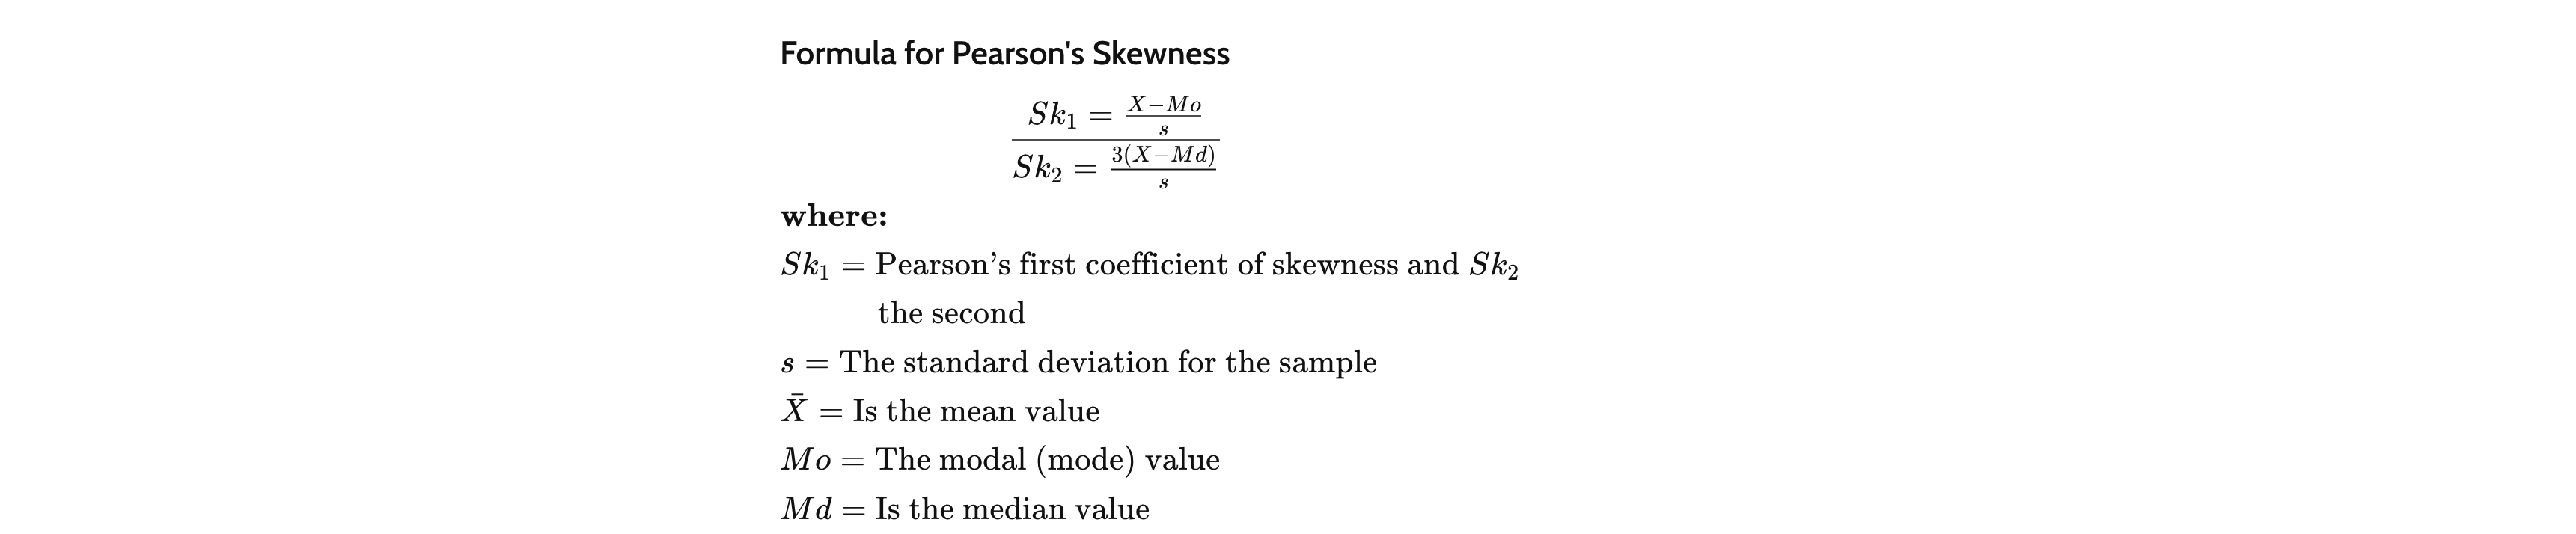

### Description :
In a distribution, if the left tail (lower values) is more spread out than the right tail (higher values), we have negative skewness. Conversely, if the right tail is more spread out than the left tail, we have positive skewness.

### Demonstration (Python code):

Suppose you're analyzing return data from two different stocks. Both stocks have similar average returns and standard deviations, but Stock A has a positive skewness, while Stock B has a negative skewness. This means that Stock A has more frequent large positive returns, while Stock B has more frequent large negative returns.

In [18]:
import numpy as np
from scipy.stats import skew, norm
import matplotlib.pyplot as plt

# generate skewed data
np.random.seed(0)
stock_A_returns = np.random.normal(loc=0.05, scale=0.1, size=1000) + np.random.exponential(scale=0.1, size=1000)
stock_B_returns = np.random.normal(loc=0.05, scale=0.1, size=1000) - np.random.exponential(scale=0.1, size=1000)

print(f"Skewness of Stock A returns: {skew(stock_A_returns)}")
print(f"Skewness of Stock B returns: {skew(stock_B_returns)}")

Skewness of Stock A returns: 0.5167597362315279
Skewness of Stock B returns: -0.44209561860672486


### Diagram : 
Visualizing the skewness of these returns using a histogram, you would see a long tail extending to the right for Stock A, and to the left for Stock B.

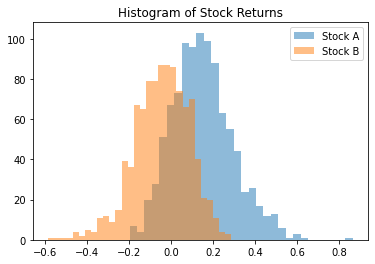

In [19]:
plt.hist(stock_A_returns, bins=30, alpha=0.5, label='Stock A')
plt.hist(stock_B_returns, bins=30, alpha=0.5, label='Stock B')
plt.legend()
plt.title('Histogram of Stock Returns')
plt.show()


### Diagnosis:
In the context of the stock return example, a significant skewness in the distribution can be identified by calculating the skewness value. As mentioned, a skewness significantly different from 0 indicates a skewed distribution. A positive value, like in the case of Stock A, indicates a distribution with a tail extending towards more positive values, whereas a negative value, as with Stock B, indicates a distribution with a tail extending towards more negative values.

A more formal way to test skewness is D’Agostino’s K^2 Test. This is a goodness of fit test, where the null hypothesis assumes that the data is normally distributed. If the test is non-significant (p>0.05), the data is considered normally distributed in terms of skewness.

In [20]:
from scipy.stats import normaltest

# Test skewness for Stock A and B
stat, p = normaltest(stock_A_returns)
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = normaltest(stock_B_returns)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=49.105, p=0.000
Statistics=36.294, p=0.000


### Damage:
The damage caused by skewness in financial data is quite significant. As most financial models (like the Black-Scholes model for options pricing) assume that returns are normally distributed, they inherently assume a skewness of 0. When actual returns are not normally distributed, these models can underestimate risk and lead to improper pricing of derivatives and incorrect portfolio optimization. In our example, a risk-averse investor might invest heavily in Stock A due to its more frequent large positive returns, but might underestimate the risk of extreme negative returns.### Damage:
If not addressed, skewness can lead to incorrect or misleading statistics, such as means and standard deviations. This could result in incorrect modeling and pricing decisions in the trading context.

### Direction:

For positively skewed data or right-skewed data, you might want to use transformations that pull in the right tail, like square root, cube root, or logarithm. Conversely, for negatively skewed data, you might want to use transformations that spread out the left tail, such as squaring or cubing.

For instance, in our stock returns example, if we apply a logarithmic transformation to the data, the skewness might be reduced:

In [21]:
import numpy as np

# Apply log transformation
stock_A_returns_log = np.log(stock_A_returns - np.min(stock_A_returns) + 1)
stock_B_returns_log = np.log(stock_B_returns - np.min(stock_B_returns) + 1)

print(f"Skewness of log-transformed Stock A returns: {skew(stock_A_returns_log)}")
print(f"Skewness of log-transformed Stock B returns: {skew(stock_B_returns_log)}")

Skewness of log-transformed Stock A returns: 0.18369666459136635
Skewness of log-transformed Stock B returns: -0.7676764453606862


It's worth noting, however, that not all transformations may work equally well for all data sets, so it's important to test multiple methods and choose the one that produces the best results for your specific use case.

Another approach is to use non-parametric or distribution-free methods that make no assumptions about the skewness of your data. Examples include the Mann-Whitney U test for comparing two groups, or the Kruskal-Wallis H test for comparing more than two groups.

If you're trying to model the data, consider using a distribution that can handle skewness, like the skew-normal distribution or the lognormal distribution. In Python, the SciPy library provides functions for working with these distributions.

# Kurtosis/Heteroscedasticity
### Definition:
Kurtosis is the measure of the "tailedness" of the probability distribution of a real-valued random variable. Heteroscedasticity refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it.
The formula to calculate kurtosis is:

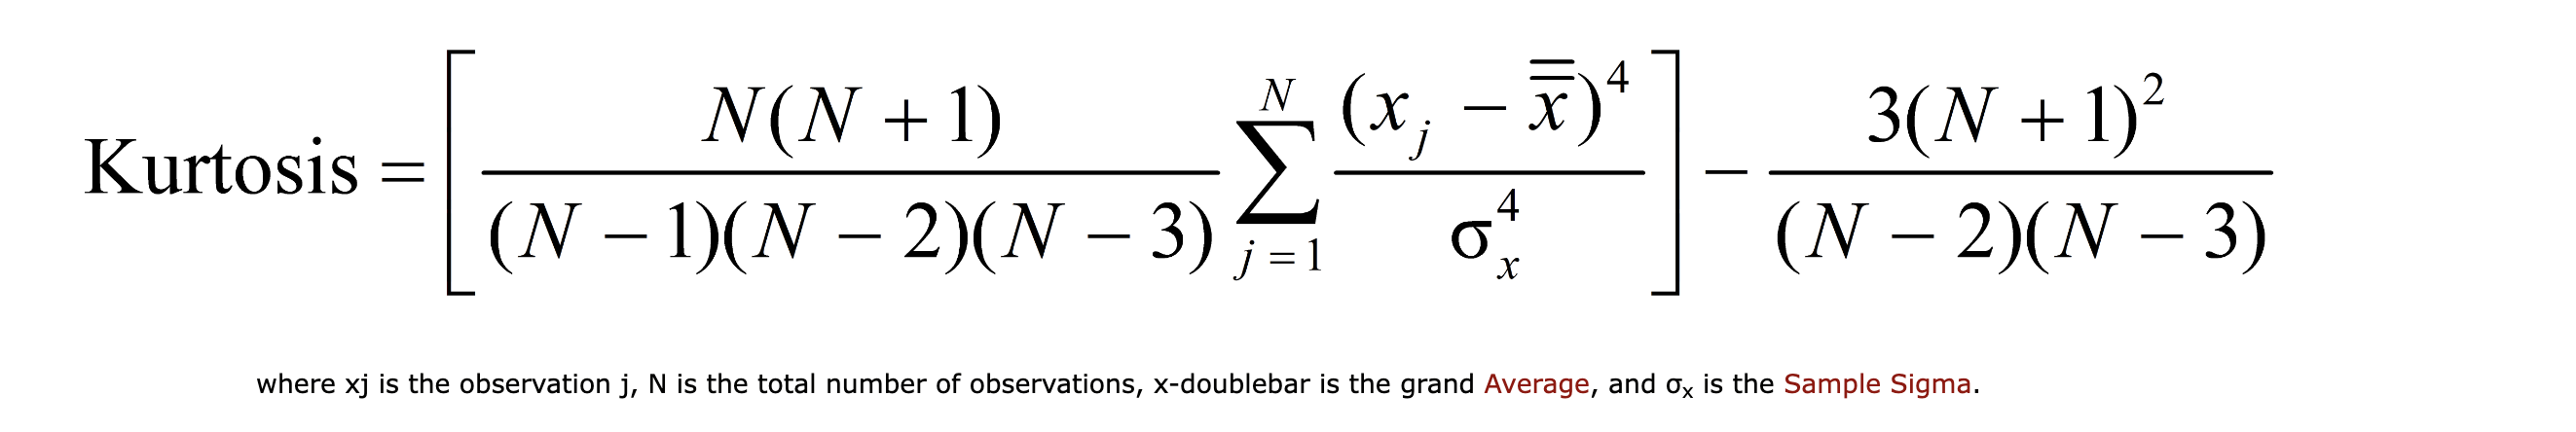

### Description:
Kurtosis indicates the weight of the tails and sharpness of a distribution. High kurtosis means heavy tails and sharp peak, while low kurtosis means light tails and flat peak. Heteroscedasticity refers to a situation where the variance of errors or the model is not constant.

### Demonstration (Python code):

Suppose you're examining the daily trading volume of a certain stock. The volume is often high on some days and low on others, suggesting a possible heteroscedasticity.

In [22]:
import pandas as pd
from arch import arch_model

# For illustration purposes, let's generate some heteroscedastic data
np.random.seed(0)
n = 1000
omega = 0.5
alpha_1 = 0.1
beta_1 = 0.8
vol = np.zeros(n)
eps = np.zeros(n)
z = np.random.normal(size=n)
for i in range(1, n):
    vol[i] = np.sqrt(omega + alpha_1 * eps[i-1]**2 + beta_1 * vol[i-1]**2)
    eps[i] = vol[i] * z[i]

# Here eps represents our heteroscedastic trading volume
trading_volume = pd.Series(eps**2, name='Trading Volume')

print(f"Kurtosis of trading volume: {trading_volume.kurtosis()}")


Kurtosis of trading volume: 8.276894617623249


Diagram: Plotting the trading volume over time will reveal periods of high volatility (high trading volume) and periods of low volatility (low trading volume).

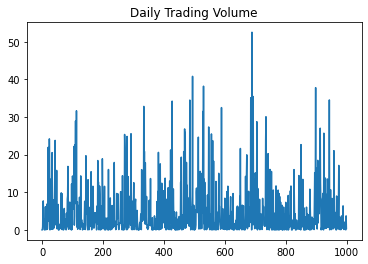

In [23]:
trading_volume.plot(title='Daily Trading Volume')
plt.show()

### Diagnosis:
In our example, visual inspection of the daily trading volume over time suggests possible heteroscedasticity - the variability in trading volume changes over time. This can be confirmed with statistical tests like the Breusch-Pagan test or White test. Another way to diagnose heteroscedasticity is by examining the residuals of a model: if the residuals increase or decrease systematically over time, heteroscedasticity is present.

Here's an example of how to perform the Breusch-Pagan test:

In [24]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Here we construct a simple regression model for the illustration purpose
X = np.column_stack((np.ones(n), np.arange(n)))
y = trading_volume.values

# Perform the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(y, X)

lzip(names, test)


[('Lagrange multiplier statistic', 0.1735378993009684),
 ('p-value', 0.6769865162318008),
 ('f-value', 0.17322088389066986),
 ('f p-value', 0.6773545129807511)]

### Damage:
Heteroscedasticity can undermine the statistical analyses that assume homoscedasticity, leading to inefficient estimates and incorrect conclusions about the relationship between the dependent and independent variables. In our trading volume example, it might lead to inefficient trading strategies based on incorrect estimates of future trading volumes. A trading model might overestimate the potential for profit on a day predicted to have high volume, but the volatility (risk) of trading on such a day is also higher.

### Directions

For data exhibiting high kurtosis (leptokurtosis) or heteroscedasticity, various transformations or modelling techniques can be used to handle these issues:

Transformations: Logarithmic, square root, and cube root transformations can be effective in reducing both high kurtosis and heteroscedasticity in data.

In [25]:
# Apply log transformation
trading_volume_log = np.log(trading_volume + 1)
print(f"Kurtosis of log-transformed trading volume: {trading_volume_log.kurtosis()}")

Kurtosis of log-transformed trading volume: -0.7296362098390263


Heavy-Tailed Distributions: If excess kurtosis or heteroscedasticity is causing issues in modeling, consider using a heavy-tailed distribution, such as the Student's t-distribution or the Generalized Extreme Value (GEV) distribution. These distributions have heavier tails than the normal distribution, which makes them more suitable for modeling data with high kurtosis or varying volatility.

In [26]:
from scipy.stats import t

# Estimate parameters
params = t.fit(trading_volume)

# Now you can generate random numbers, calculate pdfs, etc., with these parameters

Robust Statistical Techniques: These methods are less sensitive to outliers and therefore to high kurtosis or heteroscedasticity. They provide reliable estimates even when the data deviates significantly from a normal distribution.

Modeling Heteroscedasticity: For heteroscedastic time series data, models like Autoregressive Conditional Heteroscedasticity (ARCH) or Generalized Autoregressive Conditional Heteroscedasticity (GARCH) can be used. These models are capable of modeling the volatility in the data.

In [27]:
from arch import arch_model

model = arch_model(trading_volume_log, vol='Garch', p=1, q=1)
model_fit = model.fit()

print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 5207.092439931228
Iteration:      2,   Func. Count:     15,   Neg. LLF: 43001526226.135895
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1381.586873321307
Iteration:      4,   Func. Count:     31,   Neg. LLF: 1382.9893221782982
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1378.222439397081
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1377.1195716452019
Iteration:      7,   Func. Count:     48,   Neg. LLF: 1377.1156327203164
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1377.1155461676299
Iteration:      9,   Func. Count:     58,   Neg. LLF: 1377.1155433537335
Iteration:     10,   Func. Count:     62,   Neg. LLF: 1377.1155433537745
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1377.1155433537335
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results       

These are general guidelines, and the most effective solution will depend on the specifics of your data and the problem you're trying to solve. Different methods might work better in different situations, so it's worth trying multiple approaches and seeing which one works best.

# SENSITIVITY TO OUTLIERS

# Definition
**Outliers** refer to data points within a dataset that exhibit a significant deviation from the general pattern/trend observed in the data.

# DESCRIPTION

In some datasets, there may be a few data points that deviate significantly from the rest and do not align with the overall pattern. These exceptional data points, known as outliers, have the potential to greatly influence the statistical measures of the dataset. When a dataset is particularly sensitive to the presence of outliers, it becomes necessary to make specific adjustments to accommodate these rare observations and improve the modeling process.

# Demonstration

We will demonstrate outlier detection and handling techniques using real-world stock data for Volkswagen (VOW.DE) from January 1, 2008, to December 31, 2008. We will focus on identifying outliers in stock returns and their impact on volatility calculations.

volkswagen porsche short squeeze which happened in 2008 led to the extreme volatility and that's our point of discussion here.


In [34]:
#Importing All the necessary modules here

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import mstats
import statsmodels.api as sm
import seaborn as sns

ticker = "VOW.DE"
start_date = "2008-01-01"
end_date = "2008-12-31"
data = yf.download(ticker, start=start_date, end=end_date)
df = pd.DataFrame(data)

# Data preprocessing
df = df.dropna()

# Calculate returns
df['Returns'] = np.log(df['Close']).diff()


[*********************100%***********************]  1 of 1 completed


# Diagram
The diagram presents the visual representation of the real-world data (Volkswagen stock returns) and the volatility exhibited by the stock as a 30 window period. We can see from the data that the volatility was high between September and December.  

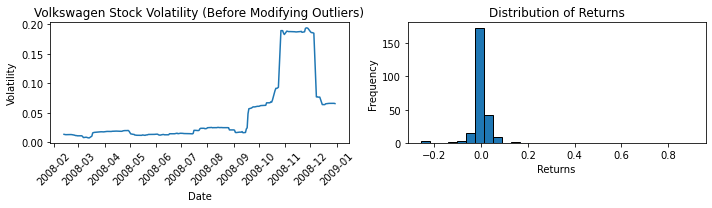

In [29]:
window = 30
df['Volatility'] = df['Returns'].rolling(window).std()

plt.figure(figsize=(10, 3))

# Plotting volatility
plt.subplot(1, 2, 1)
plt.plot(df.index, df['Volatility'])
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volkswagen Stock Volatility (Before Modifying Outliers)')
plt.xticks(rotation=45)

# Plotting histogram
plt.subplot(1, 2, 2)
plt.hist(df['Returns'], bins=30, edgecolor='black')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Distribution of Returns')

plt.tight_layout()
plt.show()


Histogram provides a visual representation of the spread and concentration of returns. 
If the outliers are extreme, they may cause the histogram to exhibit a long tail on one side, indicating a high degree of variability in returns and potential risks associated with extreme market movements.  

The Distribution shows a fat tail beyond -0.2 returns and some extreme returns beyond 0.8

# Diagnosis
**Box Plot**

A Box plot is a type of data visualisation technique which is used to analyse the dataset for its central tendency and outliers. 

**Cook's Distance**

Cook's Distance is used to find the extent of influence a data has on the regression model. A High cook's distance means the influence of the point on the regression analysis is more. 

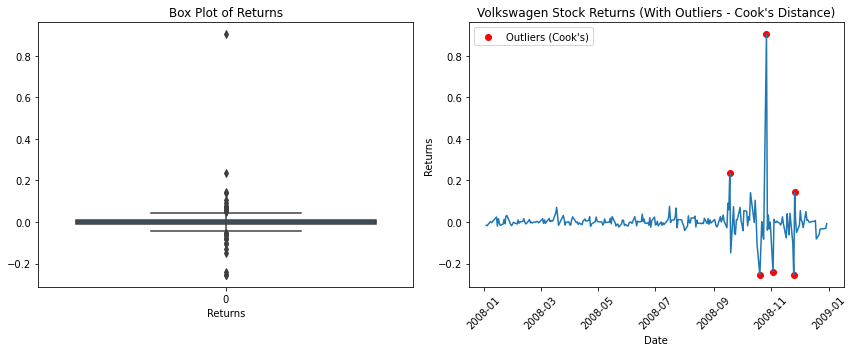

In [45]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df['Returns'])
plt.xlabel('Returns')
plt.title('Box Plot of Returns')

returns = df['Returns'].values
model = sm.OLS(returns[1:], sm.add_constant(range(len(returns) - 1)))
results = model.fit()
cooks_d = results.get_influence().cooks_distance[0]
threshold = 4 / (len(returns) - 2)
outliers_cooks = np.where(cooks_d > threshold)[0]

plt.subplot(1, 2, 2)
plt.plot(df.index[1:], returns[1:])
plt.scatter(df.index[1:][outliers_cooks], returns[1:][outliers_cooks], color='red', label='Outliers (Cook\'s)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Volkswagen Stock Returns (With Outliers - Cook\'s Distance)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.legend()
plt.show()


The points marked outside the whiskers are potential Outliers. 



# Damage
- The outliers identified in the Volkswagen data have the potential to significantly impact statistical analysis, resulting in inaccurate estimates of key metrics and hindering the effectiveness of risk management strategies and future price movement models. 
- The presence of outliers can distort the underlying distribution of the data by exerting influence on measures such as the mean or median, leading to misleading insights and affecting the accuracy of important statistical measures, such as volatility estimation and risk assessment. 
- Consequently, the presence of outliers can compromise the overall accuracy and reliability of models, which in turn can lead to misguided decision-making processes. It is essential to address and properly handle outliers to ensure more accurate and reliable analysis, as well as to make informed decisions based on a more robust understanding of the data.

# Direction
In the year 2008, Volkswagen stock experienced significant volatility due to an commonly referred to as "Volkswagen Short Squeeze". Since Porsche played a role in this squeeze, it is also called "Volkswagen Porsche Short Squeeze."
A short squeeze happens when a heavily shorted stock experiences a quick increase in its price, resulting in a short covering momentum as the short sellers are forced to square off their position. This created a panic, leading to increase in demand for the stock, thus, driving the price up. 
Since these events are very rare and current regulations strongly discourage these events, I am planning to implement winsorized method to trim some outliers. 
Winsorization is a better appraoch in handling outliers caused by events like Volkswagen Short Squeeze because,
- It changes the outliers within a certain range while adjusting extreme values.
- It makes the volatility smooth thus paving way. 
- It captures the effect of extreme events on overall data distribution.
Therefore, using winsorisation, we can obtain a more accurate assessment of volatility during the specified period.

c:\users\balak\appdata\local\programs\python\python39\lib\site-packages\numpy\core\fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


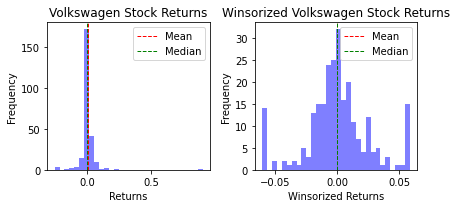

In [32]:
winsorized_returns = mstats.winsorize(df['Returns'], limits=[0.05, 0.05])
df['Returns_winsorized'] = winsorized_returns

plt.figure(figsize=(6, 3))

plt.subplot(1,2,1)
plt.hist(df['Returns'], bins=30, color='blue', alpha=0.5)
plt.axvline(df['Returns'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Returns'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Volkswagen Stock Returns')
plt.legend()


plt.subplot(1,2,2)
plt.hist(df['Returns_winsorized'], bins=30, color='blue', alpha=0.5)
plt.axvline(df['Returns_winsorized'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(df['Returns_winsorized'].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.xlabel('Winsorized Returns')
plt.ylabel('Frequency')
plt.title('Winsorized Volkswagen Stock Returns')
plt.legend()

plt.tight_layout()
plt.show()

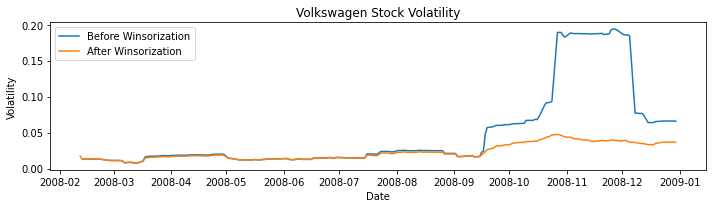

In [33]:
window = 30
df['Volatility_before'] = df['Returns'].rolling(window).std()

# Step 6: Calculate volatility after winsorization
df['Volatility_after'] = df['Returns_winsorized'].rolling(window).std()

# Step 7: Visualization
plt.figure(figsize=(10, 3))
plt.plot(df.index, df['Volatility_before'], label='Before Winsorization')
plt.plot(df.index, df['Volatility_after'], label='After Winsorization')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volkswagen Stock Volatility')
plt.legend()

plt.tight_layout()
plt.show()

The volatility plot before and after applying winsorization clearly demonstrates the significant impact of this technique on the estimation of volatility. The volatility estimation becomes more robust and representative of the underlying market situations after applying winsorization technique which can be visualized from the plot. 

# Reference:

- https://www.ft.com/content/0a58b63a-4294-3e07-8390-c3aabef39a26
- "An Introduction to Statistical Learning" by Gareth James, Daniela Witten, Trevor Hastie, and Robert Tibshirani
- Investopedia 
- World Quant University study materials
- Modules documentation